# Validating NN Model

Using validation curves to validate the model performance 

In [3]:
import activation_functions
import loss_functions
import process_MNIST
from init_NN_val import NeuralNetwork
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


#local path to files 
training_images_path =  'training_data/train-images.idx3-ubyte'
training_labels_path =  'training_data/train-labels.idx1-ubyte'
test_images_path = 'test_data/t10k-images.idx3-ubyte'
test_labels_path =  'test_data/t10k-labels.idx1-ubyte'


#Loads MNIST data files. Assumes unzipped idx files avilable at: http://yann.lecun.com/exdb/mnist/
training_images, training_labels = process_MNIST.load_data(training_images_path, training_labels_path)
test_images, test_labels = process_MNIST.load_data(test_images_path, test_labels_path)

Testing Model with Learning Rate 0.001 using Stochastic Gradient Descent

In [4]:
#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
lr = 0.001

##initialize NN 
nn_lr001_sgd = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy, lr)

##train NN (example uses mini-batch)
losses = nn_lr001_sgd.train(training_images, training_labels, epochs = 10, batch_size=1) #, debug=True, info_skip=1000)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1

##test NN
nn_lr001_sgd_cross_ent_error, nn_lr001_sgd_classification_error = nn_lr001_sgd.test(test_images, test_labels)

 10%|█         | 1/10 [01:19<11:54, 79.41s/it]

epoch loss:  3.376026878950046


 20%|██        | 2/10 [02:34<10:15, 76.94s/it]

epoch loss:  1.0532181442547621


 30%|███       | 3/10 [04:12<10:04, 86.30s/it]

epoch loss:  0.8587281242539981


 40%|████      | 4/10 [05:34<08:29, 84.88s/it]

epoch loss:  0.7520143153003945


 50%|█████     | 5/10 [06:58<07:01, 84.35s/it]

epoch loss:  0.6765948942980113


 60%|██████    | 6/10 [08:20<05:34, 83.62s/it]

epoch loss:  0.6131475792503449


 70%|███████   | 7/10 [09:20<03:47, 75.80s/it]

epoch loss:  0.5673179382826757


 80%|████████  | 8/10 [10:21<02:22, 71.30s/it]

epoch loss:  0.5305467820105582


 90%|█████████ | 9/10 [11:19<01:07, 67.20s/it]

epoch loss:  0.5014153686235688


100%|██████████| 10/10 [12:02<00:00, 72.23s/it]


epoch loss:  0.4753839561030946
Average cross entropy loss: 0.47838840859083304
Classification accuracy: 87.4%


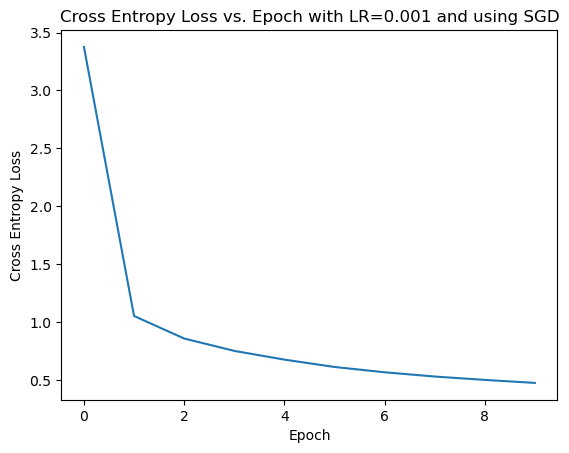

In [5]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs. Epoch with LR=0.001 and using SGD')
plt.show()

In [6]:
error_summary = stats.describe(nn_lr001_sgd_cross_ent_error)
print("mean: ", np.mean(nn_lr001_sgd_cross_ent_error))
print("median: ", np.median(nn_lr001_sgd_cross_ent_error))
print("min: ", np.min(nn_lr001_sgd_cross_ent_error))
print("max: ", np.max(nn_lr001_sgd_cross_ent_error))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(nn_lr001_sgd_cross_ent_error, q=[10, 25, 50, 75, 90]))
# print("mean: ", np.median(test_loss))

mean:  0.47838840859083304
median:  0.002461325356365219
min:  -0.0
max:  44.81381651536373
variance:  2.249802805487638
skewness:  9.107511098231113
kurtosis:  173.33409053981987
quartile:  [9.74509129e-07 7.14055747e-05 2.46132536e-03 9.69937508e-02
 1.57782644e+00]


In [7]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import Dataset
import process_MNIST
from init_Pytorch_NN import FeedForwardNN

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

batch_size = 1

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
# lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
input_size = 784  # Example: 28x28 pixels for MNIST dataset
hidden_size = [128, 64]
num_classes = 10  # Example: Number of classes for MNIST dataset
learning_rate = 0.001
num_epochs = 10

#initialize NN 
# nn = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy)
model = FeedForwardNN(input_size, hidden_size, num_classes)

##train NN (example uses mini-batch)
# nn.train(training_images, training_labels, epochs = 10, batch_size=1)
# model.train(num_epochs, batch_size=1, learning_rate=learning_rate,  training_data=training_data)
model.train(num_epochs, batch_size=input_size, learning_rate=learning_rate,  train_dataloader=train_dataloader)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1


60000it [00:36, 1653.46it/s]<?, ?it/s]
 10%|█         | 1/10 [00:36<05:26, 36.32s/it]

batch loss:  [2.1725962162017822, 2.29012393951416, 2.3708717823028564, 2.2411887645721436, 2.270867109298706, 2.197495222091675, 2.275426149368286, 2.2571420669555664, 2.400210380554199, 2.2092514038085938, 2.253725290298462, 2.192298412322998, 2.2010536193847656, 2.3501553535461426, 2.305387496948242, 2.2974531650543213, 2.343207597732544, 2.162198305130005, 2.29093861579895, 2.357815742492676, 2.3632149696350098, 2.2497406005859375, 2.2450733184814453, 2.356640577316284, 2.3310415744781494, 2.272956371307373, 2.1999268531799316, 2.2444894313812256, 2.337946891784668, 2.2965288162231445, 2.2558982372283936, 2.2347304821014404, 2.376054525375366, 2.3822269439697266, 2.402533531188965, 2.365515947341919, 2.239856719970703, 2.3513877391815186, 2.332138776779175, 2.26094388961792, 2.3521504402160645, 2.2994954586029053, 2.2941625118255615, 2.397078514099121, 2.2985949516296387, 2.340824604034424, 2.3588829040527344, 2.265819787979126, 2.3308637142181396, 2.2552082538604736, 2.37752437591

4058it [00:02, 1499.77it/s]
 10%|█         | 1/10 [00:39<05:51, 39.04s/it]


KeyboardInterrupt: 

In [ ]:

##test NN
# cross_ent_error, classification_error = nn.test(test_images, test_labels)
cross_ent_errors, classification_matches = model.test(test_dataloader, input_size=input_size)
classification_matches_fixed = [x[0] for x in classification_matches]

print('Average cross entropy loss:', np.mean(cross_ent_errors))
print(f"Classification accuracy: {(sum(classification_matches_fixed)/test_data.test_labels.size(0))*100}%")

In [ ]:
error_summary = stats.describe(cross_ent_errors)
print("mean: ", np.mean(cross_ent_errors))
print("median: ", np.median(cross_ent_errors))
print("min: ", np.min(cross_ent_errors))
print("max: ", np.max(cross_ent_errors))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))
# print("mean: ", np.median(test_loss))
# print("median: ", np.median(test_loss))
# print("min: ", np.min(test_loss))
# print("max: ", np.max(test_loss))